   # Deprem Haritası

![image](depremFayHattı.jpg)

In [1]:
import pandas as pd

In [2]:
veriler = pd.read_csv("textVeriler1.txt", encoding ='latin1', sep = '\t', names = ['No', 'DepremKodu', 'OlusTarihi', 'OlusZamani', 'Enlem', 'Boylam', 'Derinlik', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Tip', 'Yer'])

In [3]:
veriler = veriler[1:]

- No -> Sıra numarası
- Deprem Kodu -> Oluş zamanı tabanlı deprem kodu (YYYYAAGGSSDDss).
- Oluş tarihi -> YYYY.AA.GG (Yıl.Ay.Gün) formatında.
- Olus zamanı -> SS:DD:ss.ms (Saat:Dakika:saniye.milisaniye) formatında. (UTC)
- Enlem -> Derece
- Boylam -> Derece
- Der(km) -> Derinlik (Kilometre)
- xM -> Verilen magnitüd (MD, ML, Mw, Ms, Mb) değerleri içerisindeki en büyük değer.
- MD ML Mw Ms Mb -> Olası büyüklükler (MD: Süreye bağlı, ML: Local, Mw: Moment, Ms: Yüzey dalgası, Mb: Body-wave). Hesaplanmamış büyüklükler 0.0 (sıfır) olarak verilmiştir.
- Tip -> Ke: Deprem, Sm: Olası patlatma.
- Yer -> En yakın yerleşim birimi.

In [4]:
veriler.head()

,No,DepremKodu,OlusTarihi,OlusZamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
1,000001,20230831083800,2023.08.31,08:38:00.25,36.0547,27.1385,007.7,3.7,0.0,3.6,3.7,0.0,0.0,Ke,AKDENIZ
2,000002,20230829060305,2023.08.29,06:03:05.40,38.0080,38.3387,008.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKSU-CELIKHAN (ADIYAMAN) [North East 2.9 km]
3,000003,20230829045814,2023.08.29,04:58:14.00,38.9038,32.9623,002.4,5.1,0.0,5.1,4.7,0.0,0.0,Ke,TAVSANCALI-KULU (KONYA) [South West 5.3 km]
4,000004,20230827030942,2023.08.27,03:09:42.97,36.3487,27.8080,065.3,4.4,0.0,4.4,0.0,0.0,0.0,Ke,AKDENIZ
5,000005,20230826091713,2023.08.26,09:17:13.88,35.8478,35.9930,008.1,3.6,0.0,3.5,3.6,0.0,0.0,Ke,YAYLADAGI (HATAY) [South West 8.8 km]


In [5]:
import csv

with open('veriler.csv', 'w', encoding="utf-8") as file:
    writer = csv.writer(file)
    field = ['No', 'DepremKodu', 'OlusTarihi', 'OlusZamani', 'Enlem', 'Boylam', 'Derinlik', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Tip', 'Yer']
    
    writer.writerow(field)
    for i in range(len(veriler)):
        writer.writerow(veriler.iloc[i])

In [6]:
veriler = pd.read_csv("veriler.csv", encoding='latin-1')

In [7]:
veriler.head()

,No,DepremKodu,OlusTarihi,OlusZamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,20230831083800,2023.08.31,08:38:00.25,36.0547,27.1385,7.7,3.7,0.0,3.6,3.7,0.0,0.0,Ke,AKDENIZ
1,2,20230829060305,2023.08.29,06:03:05.40,38.0080,38.3387,8.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKSU-CELIKHAN (ADIYAMAN) [North East 2.9 km]
2,3,20230829045814,2023.08.29,04:58:14.00,38.9038,32.9623,2.4,5.1,0.0,5.1,4.7,0.0,0.0,Ke,TAVSANCALI-KULU (KONYA) [South West 5.3 km]
3,4,20230827030942,2023.08.27,03:09:42.97,36.3487,27.8080,65.3,4.4,0.0,4.4,0.0,0.0,0.0,Ke,AKDENIZ
4,5,20230826091713,2023.08.26,09:17:13.88,35.8478,35.9930,8.1,3.6,0.0,3.5,3.6,0.0,0.0,Ke,YAYLADAGI (HATAY) [South West 8.8 km]


In [8]:
for i in range(1, len(veriler["Yer"])): 
    veriler["Yer"][i] = veriler["Yer"][i].split("[")[0]

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_12212/3328957062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veriler["Yer"][i] = veriler["Yer"][i].split("[")[0]


In [9]:
import seaborn as sns

In [10]:
veriler["Yer"].value_counts()

AKDENIZ                          1594
EGE DENIZI                        270
ONIKI ADALAR (AKDENIZ)            192
GOKOVA KORFEZI (AKDENIZ)          178
KUSADASI KORFEZI (EGE DENIZI)     142
                                 ... 
CITAK-GUROYMAK (BITLIS)             1
GUZELSU-AHLAT (BITLIS)              1
ALIC-ILGAZ (CANKIRI)                1
SASAL-MENDERES (IZMIR)              1
DINLENCE-ERCIS (VAN)                1
Name: Yer, Length: 3490, dtype: int64

<AxesSubplot:xlabel='Yer'>

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0, flags=flags)


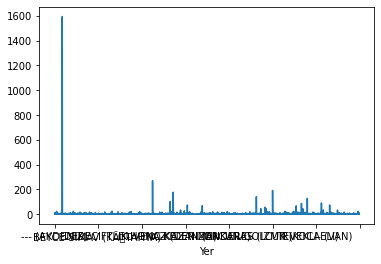

In [11]:
veriler.groupby(["Yer"]).size().plot()

In [12]:
mlVeri = []
yerVeri = []
enlemVeri = []
boylamVeri = [] 

In [13]:
for i in range(1, len(veriler)):
    if float(veriler["ML"][i]) > 4.5 and veriler["Tip"][i] == "Ke":
        mlVeri.append(veriler["ML"][i])
        yerVeri.append(veriler["Yer"][i])
        enlemVeri.append(veriler["Enlem"][i])
        boylamVeri.append(veriler["Boylam"][i])

In [14]:
MLVeri = pd.DataFrame(mlVeri, columns = ["ML"])
YerVeri = pd.DataFrame(yerVeri, columns = ["Yer"])
enlemVeri = pd.DataFrame(enlemVeri, columns = ["Enlem"])
boylamVeri = pd.DataFrame(boylamVeri, columns = ["Boylam"])

mlyerVeri = pd.concat([MLVeri, YerVeri], axis = 1) 
mlyerVeri = pd.concat([mlyerVeri, enlemVeri], axis = 1)
mlyerVeri = pd.concat([mlyerVeri, boylamVeri], axis = 1)

In [15]:
mlyerVeri.head()

,ML,Yer,Enlem,Boylam
0,5.1,TAVSANCALI-KULU (KONYA),38.9038,32.9623
1,5.0,SEYITUSAGI-YESILYURT (MALATYA),38.2652,38.2040
2,4.8,KIRKISRAK-SARIZ (KAYSERI),38.4567,36.6812
3,4.6,YETIMLI-ALADAG (ADANA),37.6587,35.3930
4,4.9,IKIZCE-YESILYURT (MALATYA),38.2955,38.1770


In [16]:
get_ipython().system('pip install folium')


[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import streamlit as st
from streamlit_folium import st_folium
import folium

In [35]:
m = folium.Map(
    location=[37.9038, 35.9623],
    zoom_start=6)

for i in range(len(mlyerVeri)):
    folium.Marker([float(mlyerVeri["Enlem"][i]), float(mlyerVeri["Boylam"][i])]).add_to(m)
    '''folium.CircleMarker(
    location=[float(mlyerVeri["Enlem"][i]), float(mlyerVeri["Boylam"][i])],
    radius=50,
    color='#3186cc',
    fill=True,
    fill_color='#3186cc').add_to(m)
    '''
    

m.save('/map.html')

In [36]:
from IPython.display import IFrame

In [38]:
#IFrame(src='http://localhost:8888/view/map.html', width=900, height=600)

![image](map.png)